## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv("./final_data1.csv")

In [3]:
df.shape

(9077, 20)

In [4]:
df.head(2)

,Unnamed: 0,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [5]:
df.drop(columns='Unnamed: 0' , inplace = True)
df.drop(columns='name' , inplace = True)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [6]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value


In [7]:
# Completeness
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
dtype: int64

In [8]:
# Accurecy types
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
dtype: object

In [10]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
Cate_values = ['team' , 'position']
Num_values = ['height' , 'age' , 'appearance' , 'goals' , 'assists' , 'yellow cards' , 'second yellow cards' , 'red cards' , 'goals conceded' , 'clean sheets' , 'minutes played' , 'days_injured' , 'games_injured' , 'award' , 'current_value' , 'highest_value']

In [11]:
for i in Cate_values:
    print(df[i].value_counts())

team
Jeonbuk Hyundai Motors    44
Gangwon FC                41
Daegu FC                  41
Daejeon Hana Citizen      40
Swallows FC               39
                          ..
Gaziantep FK               5
Atlético de Madrid         5
Bayern Munich              4
Real Madrid                4
FC Barcelona               4
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1581
Attack Centre-Forward         1067
Goalkeeper                    1029
midfield-CentralMidfield       981
Defender Right-Back            781
midfield-DefensiveMidfield     764
Defender Left-Back             717
midfield-AttackingMidfield     640
Attack-RightWinger             607
Attack-LeftWinger              582
midfield-RightMidfield          88
midfield-LeftMidfield           86
midfield                        49
Attack-SecondStriker            47
Attack                          34
Defender                        24
Name: count, dtype: int64


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [12]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [13]:
Cate_values

['team', 'position']

In [14]:
# one hot coding
df = pd.get_dummies(df, columns=Cate_values)

In [15]:
df.shape

(9077, 406)

#### 3. Feature selection

In [15]:
# sns.heatmap(df.corr(), annot=True);

In [16]:
correlation = df.corr()
correlation['current_value'].sort_values(ascending=False)

current_value          1.000000
highest_value          0.775941
appearance             0.430198
minutes played         0.417824
assists                0.199464
                         ...   
position_midfield     -0.044875
clean sheets          -0.059877
age                   -0.073193
goals conceded        -0.084886
position_Goalkeeper   -0.105705
Name: current_value, Length: 406, dtype: float64

In [17]:
# Set the correlation threshold
threshold = 0.4  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value'], dtype='object')

In [18]:
selected_features = ['appearance', 'minutes played', 'current_value', 'highest_value']

In [19]:
df = df[selected_features]
df.head()

,appearance,minutes played,current_value,highest_value
0,15,1304,1500000,22000000
1,34,2758,2000000,2000000
2,34,2686,10000000,12000000
3,39,2788,800000,800000
4,51,3512,800000,800000


#### 4. Prepare train and test data

In [20]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X.shape

(9077, 3)

## Buliding the Model

In [22]:
model = LinearRegression()

## Train the Model

In [23]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [24]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [25]:
model.coef_

array([-194996.95365445,  714559.86567209, 2492931.29124792])

In [26]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-1.949970e+05
minutes played,7.145599e+05
highest_value,2.492931e+06


In [27]:
print(model.intercept_) 

2156818.62002479


In [41]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

NameError: name 'lasso_model' is not defined

## Evaluating the Model 

1. Mean Square Error

In [29]:
y_base = [y_train.mean()] * len(y_test)

In [30]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 11683904621640.627


In [31]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 4401907162875.462
Mean Squared Error for testing: 4600628973953.57


2. Mean Absolute Error

In [32]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 2214676.0675887777


In [33]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1159479.968956738
Mean Absolute Error for testing: 1182346.684299792


3. Root Mean Squared Error

In [34]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1488.1787754126779


In [35]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2098072.249202935
Root Mean Squared Error for testing: 2144907.6842497373


4. R Square

In [36]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6274579214818918
R Square for testing: 0.6062278735560351


#### Predictions vs. Real Values

In [37]:
predictions = model.predict(X_test_scaled)
#predictions

In [38]:
Real_Values = np.array(y_test)
#Real_Values

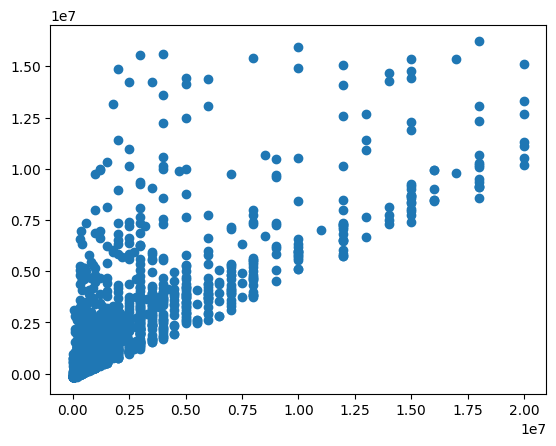

In [39]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

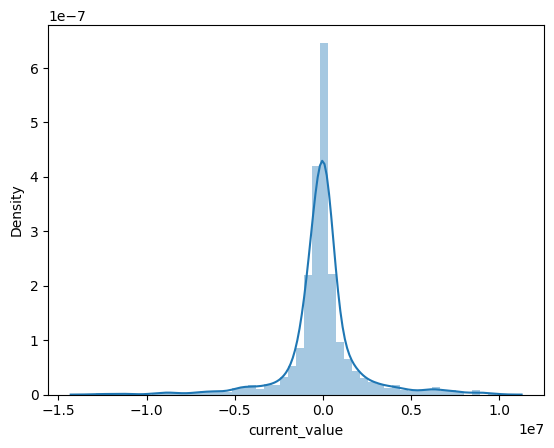

In [40]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution